In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-loan-classification-dataset/loan.csv


In [15]:
import pandas as pd
df = pd.read_csv("/kaggle/input/simple-loan-classification-dataset/loan.csv")


In [3]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
df.isnull().sum()
df.ffill(inplace=True)  # Forward fill
df.dropna(inplace=True)  # Remove missing values


In [5]:
df.drop_duplicates(inplace=True)


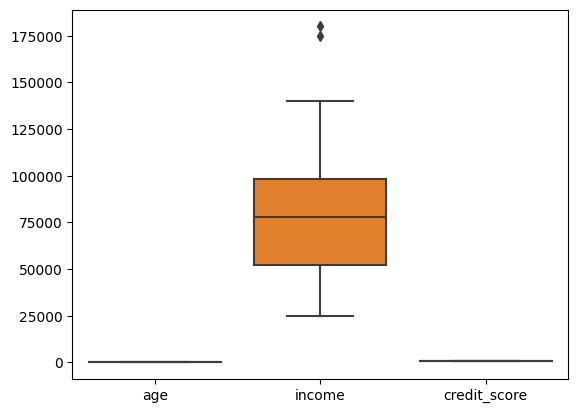

In [6]:
import seaborn as sns
sns.boxplot(data=df)
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1
num_cols = df.select_dtypes(include=['number']).columns
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [7]:
df.describe()


,age,income,credit_score
count,59.000000,59.000000,59.000000
mean,36.711864,75644.067797,705.932203
std,8.317101,28872.945642,70.640387
min,24.000000,25000.000000,560.000000
25%,30.000000,51000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,42.500000,95000.000000,760.000000
max,55.000000,140000.000000,810.000000


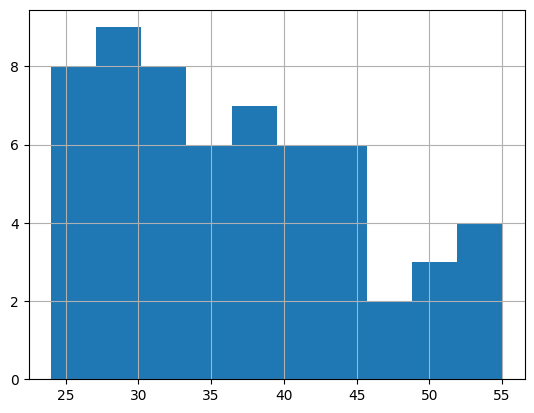

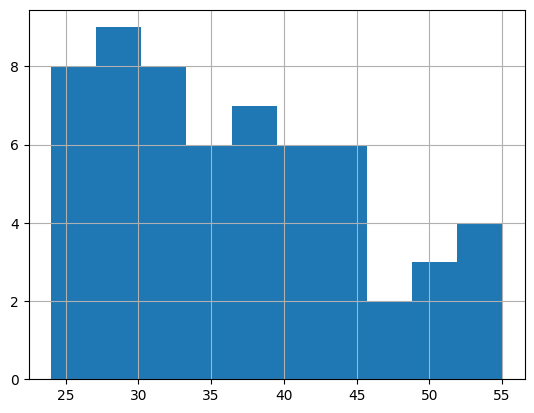

In [8]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols) > 0:
    df[num_cols[0]].hist()
    plt.show()
else:
    print("No numerical columns found!")
df = df.copy()  # Create a fresh copy to avoid warnings
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].hist()
plt.show()



In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical to numerical
print(df_encoded.head())  # Check the transformed data
print(df_encoded.corr())  # This should now work



   age  income  credit_score  gender_Male  occupation_Analyst  \
0   32   85000           720         True               False   
1   45   62000           680        False               False   
2   28   25000           590         True               False   
3   51  105000           780        False               False   
4   36   75000           710         True               False   

   occupation_Architect  occupation_Artist  occupation_Banker  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   

   occupation_Chef  occupation_Consultant  ...  occupation_Stylist  \
0            False                  False  ...               False   
1            False                  False  ...               False   
2       

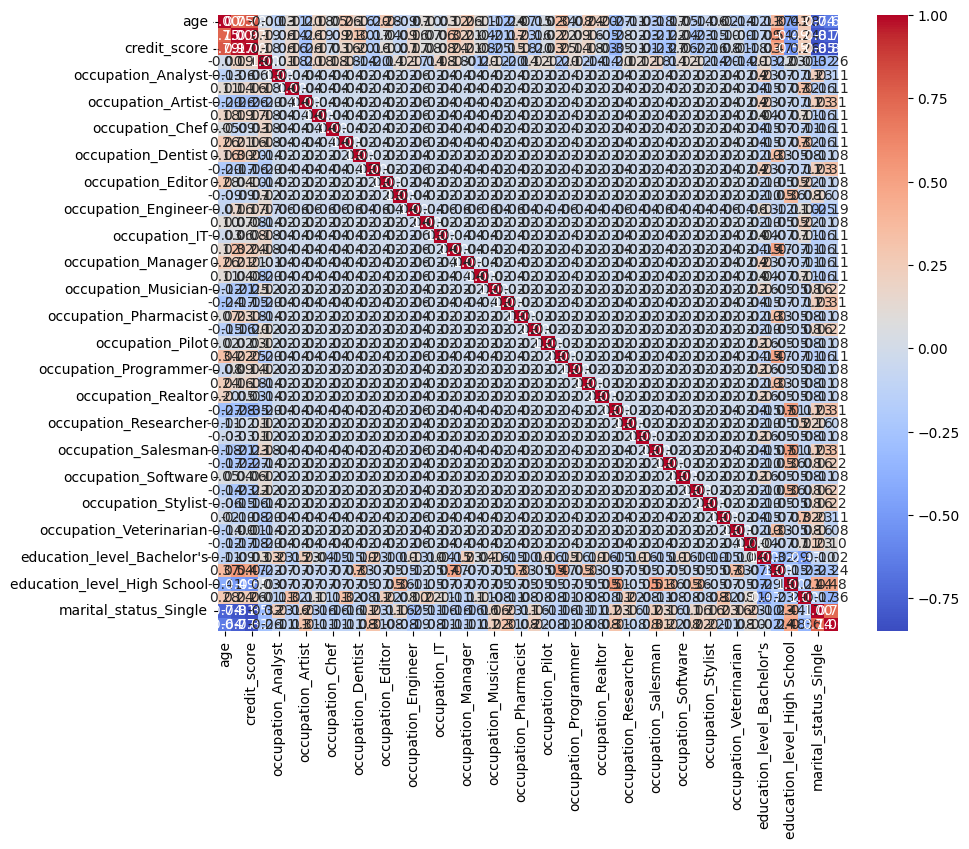

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


<Axes: xlabel='age', ylabel='income'>

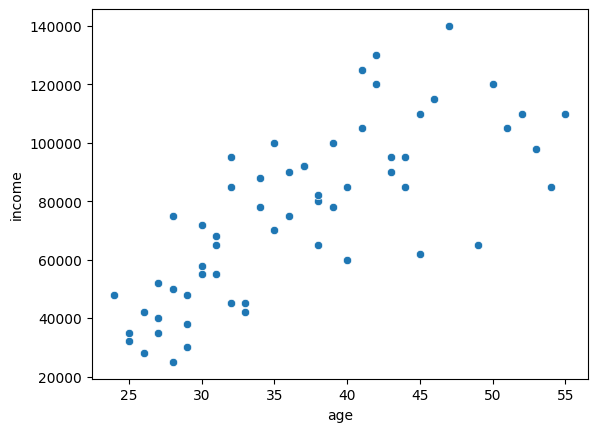

In [11]:

sns.scatterplot(x='age', y='income', data=df)


<Axes: xlabel='marital_status', ylabel='income'>

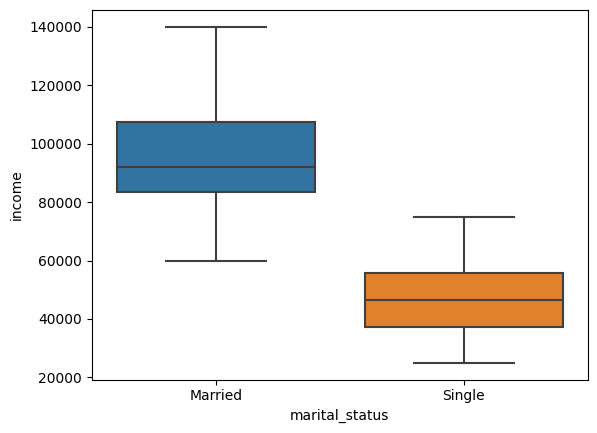

In [12]:
sns.boxplot(x='marital_status', y='income', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


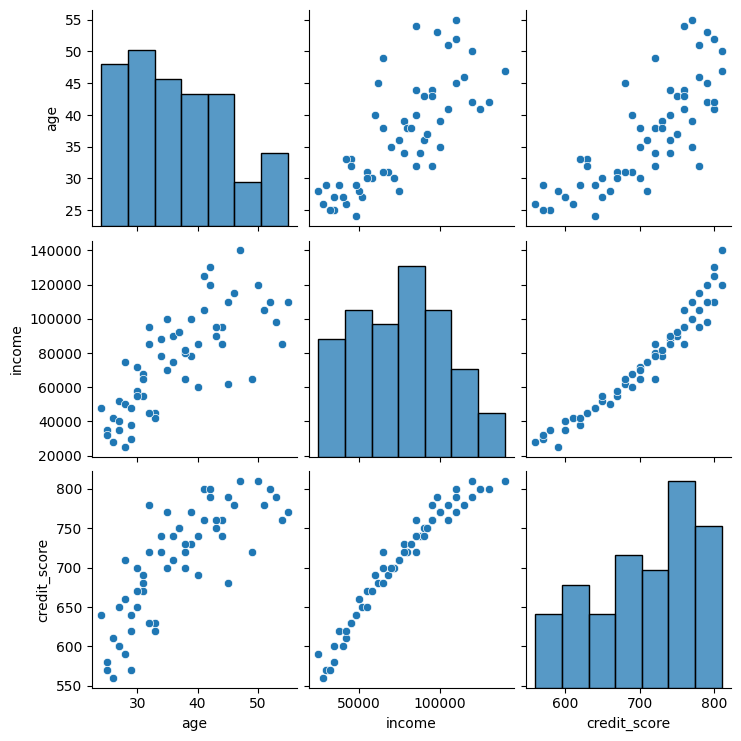

In [13]:
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
sns.pairplot(df)


In [17]:
df.groupby('age')['income'].mean()


age
24     48000.000000
25     33500.000000
26     35000.000000
27     42333.333333
28     50000.000000
29     38666.666667
30     61666.666667
31     62666.666667
32     75000.000000
33     43500.000000
34     83000.000000
35     85000.000000
36     82500.000000
37     92000.000000
38     75666.666667
39     89000.000000
40     72500.000000
41    115000.000000
42    125000.000000
43     92500.000000
44     90000.000000
45     86000.000000
46    115000.000000
47    140000.000000
48    177500.000000
49     65000.000000
50    120000.000000
51    105000.000000
52    110000.000000
53     98000.000000
54     85000.000000
55    110000.000000
Name: income, dtype: float64